
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Won Lee (Wl6289), Sam Malcolm (STM2334) </p>
## <p style="text-align: center;">Total points: 70</p>
## <p style="text-align: center;">Due: Tuesday, November 13th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).** In addition, please convert **your filename including your EID** (ex. ss324.jpynb or ss324_mj345.jpypb).

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Reject Option (20 Points)


For the Loss matrix given below, compute  the range of P(C1|x) where (i) It is best to call "Class 1", and (ii) where it is best to take the reject option.

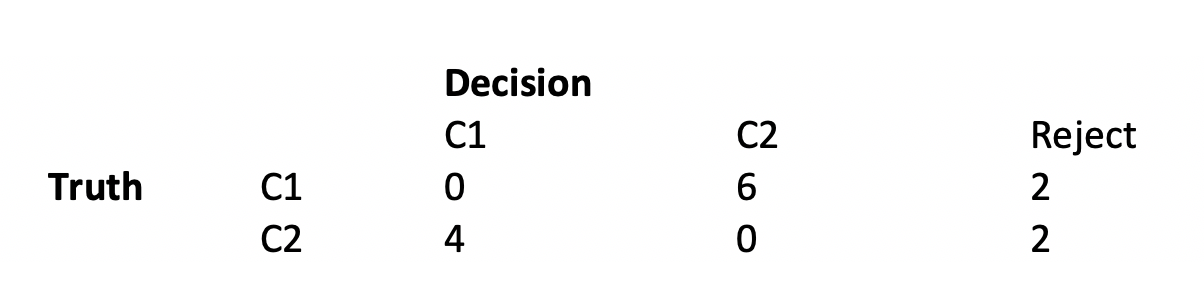

## Answer

#### Part i

P(C1|x) = y

4 - 4y = 6y

4 = 10y

.4 = y

When P(C1|x) > .4, it is best to call "Class 1"

#### Part ii

4-4y > 2

2 > 4y

1/2 > y

///

6y > 2

y > 1/3

///

When P(C1|x) 

#### Answer

Choose reject when 1/3 < P(C1|x) < 1/2

Call "Class 1" when P(C1|x) > 1/2


# Question 2 - Concepts (15 pts)

1. (3+3+4 pts) Briefly describe what you understand by a Lift curve/chart? How is it similar to an ROC curve and in what way is it different? Provide an example where you might prefer using Lift (for a certain decile) over AUROC (AUC) as a point measure of the performance of your classifier. (Point measure means evaluation using a single numeric value.)


2. (5 pts) Explain what it means to calibrate a classifier. Give an example of an application where having a well calibrated model is important, and it is not enough to just estimate what the most likely class label is for a given data point.

## Answer

1.


A lift curve or chart can measure the effectiveness of a model. Additionally, it can also identify sections of a sample that returns more positive responses than the baseline. They often rank the cumulative gain or lift against the cumulative percentage of the measured sample. Additionally, they are often compared to a baseline, similar to an ROC curve, which has useful applications in marketing. 

The lift curves or charts for each model can be compared as well to find the most appropriate model, and we can use the area underneath as a metric for performance, similar in function to a ROC curve. To further elaborate, we want to compare the percentage of positive responses from the sample to the percentage of the sample tested in a graph or chart. So, in a sense, a lift curve or chart can show us how much of the sample can contribute to the percentage of positive responses from the sample. On the other hand, a ROC curve compares the true positive response rate to the false positive response rate as a measure of efficiency.

One popular example where the lift curve would be preferred to the AUC is in the area of marketing, particularly promotion campaigns where we want to capture a portion of the market that has the highest return on investment. We want to limit our costs while maximizing our profits by looking to draw in customers, until the customer does not return over the baseline or over the cost. So essentially, like in economics, we want to sell until our marginal revenue equal to marginal cost, thus maximizing our profit while limiting costs. The lift curve can tell us which customers to prioritize in marketing. So, for instance, the lift curve or chart can tell us that marketing to only our top 20% customer is the most profitable route and that investing in any other is inefficient. AUC, however, would only allow us to gauge how likely a response is from the entire sample. This prevents us from "positioning" ourselves to obtain customers that are the best fit for the firm.

2.


Calibration is used to have the estimated probabilities reflect the true underlying probability of the sample, therefore a well-calibrated classifier should reflect the true likelihood of the event in question. It is used to allow the classifier to become less biased, therefore a classifier that is perfectly calibrated is unbiased in nature. Consequently, a well-calibrated classifier, as stated above, will predict results at the same probability in which they actually occur. So, to calibrate a classifier is to have a less biased classifier that is more accurate to what is represented in the sample.

To minimize the mistake rate, we need to find the most likely class label, but this is not necessarily what we want to do in all cases. For instance, imagine we work at a company where safety is the top priority like Boeing or Southwest where having a well-calibrated model is needed to root out faulty parts. A mistake may lead to a tragic accident, costly in both lives and money. In this instance, it is more important to detect faulty parts or true positives as much as possible over that of false positives where a non-faulty part is deemed to be faulty when it is not. While the company can lose money by misclassifying non-faulty parts as faulty, the cost is more bearable compared to having a false negative where we judge a faulty part to be non-faulty. It is not good enough to find the most likely class label, rather we need to set a goal that best fits the situation. In this instance, we want to minimize the number of false negative as much as possible first before looking to maximize true positives. 


# Question 3 - MNIST Classification (20 pts)

In this problem, you will classify between digits 8 and 9 of the MNIST dataset using Logistic Regression, Naive Bayes, and MLP. The code below loads the dataset, splits it into training and testing sets, and extracts the images containing either 8 or 9. The modules you will need from scikit-learn are loaded for you.

1. Train Logistic Regression, (Gaussian) Naive Bayes, and MLP classifiers. Extract the probability of the class being 'Digit 8' or 'Digit 9' for every row.

2. (6 pts) Use this to plot the receiver operating characteristic (ROC) curve. (one figure for all 3 models, with a label for each line)

3. (6 pts) Report the area under the ROC curve (AUC) and the accuracy for each model.

4. (6 pts)  For each of the 3 models, show a scatterplot of the obtained posterior probability estimates  vs. ground truth label value, for the data points in the test set. 

5. (2 pts) What do you notice about the distribution of the Naive Bayes estimated posterior probability values compared to the estimates from the other two models? 

In [112]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original", data_home='./dataset/')  # data downloaded in'./dataset/', change if necessary

X= (mnist.data / 255.)
y = mnist.target

num_train = 60000
idxs_perm = np.random.permutation(X.shape[0])
idxs_train = idxs_perm[:num_train]
idxs_test = idxs_perm[num_train:]

In [113]:
X_train = X[idxs_train]
y_train = y[idxs_train]
X_test = X[idxs_test]
y_test = y[idxs_test]

In [114]:
digits = [8, 9]
idx = (y_train == digits[0]) + (y_train==digits[1])
X_train = X_train[idx]
y_train = y_train[idx]
y_train = (y_train-digits[0])

idx = (y_test == digits[0]) + (y_test==digits[1])
X_test = X_test[idx]
y_test = y_test[idx]
y_test = (y_test-digits[0])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((11831, 784), (11831,), (1952, 784), (1952,))


## Answer

#### 1. Train Logistic Regression, (Gaussian) Naive Bayes, and MLP classifiers. Extract the probability of the class being 'Digit 8' or 'Digit 9' for every row.

In [131]:
### Logistic Regression

clf_log = LogisticRegression()
clf_log.fit(X_train, y_train)
log_prob = clf_log.predict_proba(X_test)[:,1]

In [132]:
### Gaussian Naive Bayes

clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
nb_prob = clf_nb.predict_proba(X_test)[:,1]

In [133]:
### MLP Classifier

clf_mlp = MLPClassifier()
clf_mlp.fit(X_train, y_train)
mlp_prob = clf_mlp.predict_proba(X_test)[:,1]

#### 2. Use this to plot the receiver operating characteristic (ROC) curve. (one figure for all 3 models, with a label for each line)

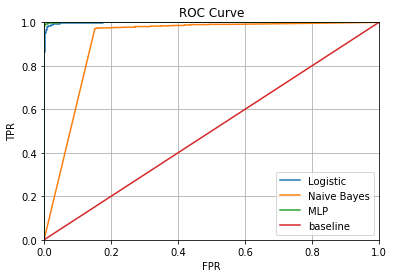

In [134]:
tpr = {}
fpr = {}
roc = {}
model = ['Logistic', 'Naive Bayes', 'MLP']
y_pred = [log_prob, nb_prob, mlp_prob]

for i in range(len(model)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred[i])
    roc[i] = roc_auc_score(y_test, y_pred[i])
    
for i in range(len(model)):
    plt.plot(fpr[i], tpr[i], label = model[i])
plt.plot([0, 1], [0, 1], label = 'baseline')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)

#### 3. Report the area under the ROC curve (AUC) and the accuracy for each model.

In [135]:
log_pred = clf_log.predict(X_test)
nb_pred = clf_nb.predict(X_test)
mlp_pred = clf_mlp.predict(X_test)

log_acc = accuracy_score(y_test, log_pred)
nb_acc = accuracy_score(y_test, nb_pred)
mlp_acc = accuracy_score(y_test, mlp_pred)

In [136]:
print 'AUC - Logistic: %f'%(roc[0])
print 'AUC - Naive Bayes: %f'%(roc[1])
print 'AUC - MLP: %f'%(roc[2])

print '\n'

print 'Accuracy - Logistic: %f'%(log_acc)
print 'Accuracy - Naive Bayes: %f'%(nb_acc)
print 'Accuracy - MLP: %f'%(mlp_acc)

AUC - Logistic: 0.998354
AUC - Naive Bayes: 0.913188
AUC - MLP: 0.999684


Accuracy - Logistic: 0.982582
Accuracy - Naive Bayes: 0.894467
Accuracy - MLP: 0.994365


#### 4. For each of the 3 models, show a scatterplot of the obtained posterior probability estimates vs. ground truth label value, for the data points in the test set.

In [142]:
colors = []

for i in range(len(y_test)):
    if y_test[i] == 1:
        colors.append('blue')
    else:
        colors.append('red')

index = range(1,len(y_test)+1)

Ground Truths: Red = 0, Blue = 1


Text(0.5,0,'Observation')

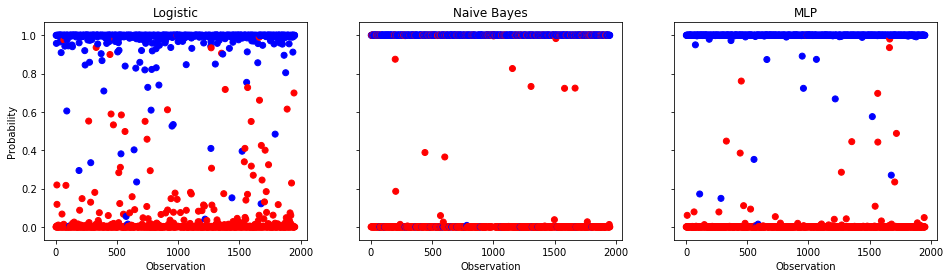

In [146]:
from pylab import subplots

print "Ground Truths: Red = 0, Blue = 1"

fig, (ax1, ax2, ax3) = subplots(nrows=1,
                                ncols=3,
                                sharey=True,
                                figsize=(16,4))
ax1.scatter(index, log_prob, color = colors)
ax1.set_title('Logistic')
ax1.set_xlabel('Observation')
ax1.set_ylabel('Probability')

ax2.scatter(index, nb_prob, color = colors)
ax2.set_title('Naive Bayes')
ax2.set_xlabel('Observation')

ax3.scatter(index, mlp_prob, color = colors)
ax3.set_title('MLP')
ax3.set_xlabel('Observation')

#### 5. What do you notice about the distribution of the Naive Bayes estimated posterior probability values compared to the estimates from the other two models?

The Naive Bayes posterior probabilities are much more firmly split. They are significantly more likely to be either exactly 0 or exactly 1 whereas the MLP and Logistic (especially) models have a higher frequency of probabilities between 0 and 1. It is this rigidity that has led the Naive Bayes model to be the least accurate among the two as it loses the subtlety and distinction amongst the features when forming its predictions.